## **6. Groceries dataset (cộng 0.5 điểm nếu làm đúng)**

- Tạo tập tin: question_6.ipynb (toàn bộ code của câu 6 sẽ được viết trong file này)
- Cho dữ liệu ItemList.xlsx
- Yêu cầu: Áp dụng thuật toán Apriori để tính toán mức độ kết hợp giữa các item.
1. Đọc và chuẩn hóa dữ liệu
2. Áp dụng Apriori, tìm kết quả. (Chú ý : tự lựa chọn các tham số phù hợp cho thuật
toán, lưu ý với số lượng transaction càng nhiều thì các ngưỡng càng nhỏ)
3. Trực quan hóa dữ liệu: Vẽ biểu đồ thể hiện 15 sản phẩm được mua nhiều nhất.
4. Tìm kiếm thông tin từ kết quả: nếu mua 'sausage' thì được gợi ý mua gì?

In [1]:
# https://drive.google.com/file/d/1fpVg1rfQfHzFptCyfxZAs7HUUXvzc8Vt/view?usp=sharing
system('gdown --id 1fpVg1rfQfHzFptCyfxZAs7HUUXvzc8Vt')


In [2]:
install.packages("arules")
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages('xlsx')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’




In [6]:
library("arules")
library("RColorBrewer")
library("devtools")
library(xlsx)

In [16]:
tr1 <- read.transactions("ItemList.csv", format = "basket", sep=",")
tr1

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 14964 transactions (rows) and
 168 items (columns)

In [20]:
length(tr1)

[1] 14964

In [18]:
inspect(tr1[1:10])

     items                                             
[1]  {itemList}                                        
[2]  {sausage, semi-finished bread, whole milk, yogurt}
[3]  {pastry, salty snack, whole milk}                 
[4]  {canned beer, misc. beverages}                    
[5]  {hygiene articles, sausage}                       
[6]  {pickled vegetables, soda}                        
[7]  {curd, frankfurter}                               
[8]  {rolls/buns, sausage, whole milk}                 
[9]  {soda, whole milk}                                
[10] {beef, white bread}                               


In [19]:
# make always sure that the items were properly separated
itemLabels(tr1)

[1] "abrasive cleaner"          "artif. sweetener"         
  [3] "baby cosmetics"            "bags"                     
  [5] "baking powder"             "bathroom cleaner"         
  [7] "beef"                      "berries"                  
  [9] "beverages"                 "bottled beer"             
 [11] "bottled water"             "brandy"                   
 [13] "brown bread"               "butter"                   
 [15] "butter milk"               "cake bar"                 
 [17] "candles"                   "candy"                    
 [19] "canned beer"               "canned fish"              
 [21] "canned fruit"              "canned vegetables"        
 [23] "cat food"                  "cereals"                  
 [25] "chewing gum"               "chicken"                  
 [27] "chocolate"                 "chocolate marshmallow"    
 [29] "citrus fruit"              "cleaner"                  
 [31] "cling film/bags"           "cocoa drinks"             
 [33] "coffee"                    "condensed milk"           
 [35] "cooking chocolate"         "cookware"                 
 [37] "cream"                     "cream cheese"             
 [39] "curd"                      "curd cheese"              
 [41] "decalcifier"               "dental care"              
 [43] "dessert"                   "detergent"                
 [45] "dish cleaner"              "dishes"                   
 [47] "dog food"                  "domestic eggs"            
 [49] "female sanitary products"  "finished products"        
 [51] "fish"                      "flour"                    
 [53] "flower (seeds)"            "flower soil/fertilizer"   
 [55] "frankfurter"               "frozen chicken"           
 [57] "frozen dessert"            "frozen fish"              
 [59] "frozen fruits"             "frozen meals"             
 [61] "frozen potato products"    "frozen vegetables"        
 [63] "fruit/vegetable juice"     "grapes"                   
 [65] "hair spray"                "ham"                      
 [67] "hamburger meat"            "hard cheese"              
 [69] "herbs"                     "honey"                    
 [71] "house keeping products"    "hygiene articles"         
 [73] "ice cream"                 "instant coffee"           
 [75] "Instant food products"     "itemList"                 
 [77] "jam"                       "ketchup"                  
 [79] "kitchen towels"            "kitchen utensil"          
 [81] "light bulbs"               "liqueur"                  
 [83] "liquor"                    "liquor (appetizer)"       
 [85] "liver loaf"                "long life bakery product" 
 [87] "make up remover"           "male cosmetics"           
 [89] "margarine"                 "mayonnaise"               
 [91] "meat"                      "meat spreads"             
 [93] "misc. beverages"           "mustard"                  
 [95] "napkins"                   "newspapers"               
 [97] "nut snack"                 "nuts/prunes"              
 [99] "oil"                       "onions"                   
[101] "organic products"          "organic sausage"          
[103] "other vegetables"          "packaged fruit/vegetables"
[105] "pasta"                     "pastry"                   
[107] "pet care"                  "photo/film"               
[109] "pickled vegetables"        "pip fruit"                
[111] "popcorn"                   "pork"                     
[113] "pot plants"                "potato products"          
[115] "preservation products"     "processed cheese"         
[117] "prosecco"                  "pudding powder"           
[119] "ready soups"               "red/blush wine"           
[121] "rice"                      "roll products"            
[123] "rolls/buns"                "root vegetables"          
[125] "rubbing alcohol"           "rum"                      
[127] "salad dressing"            "salt"                     
[129] "salty snack"               

In [44]:
# Ap dung Apriori
rules1 <- apriori(tr1, parameter = list(supp = 0.001, conf = 0.002))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
      0.002    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[168 item(s), 14964 transaction(s)] done [0.00s].
sorting and recoding items ... [149 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [1337 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [45]:
summary(rules1)

set of 1337 rules

rule length distribution (lhs + rhs):sizes
   1    2    3 
 126 1184   27 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   1.926   2.000   3.000 

summary of quality measures:
    support           confidence          coverage             lift       
 Min.   :0.001002   Min.   :0.002005   Min.   :0.005346   Min.   :0.3752  
 1st Qu.:0.001270   1st Qu.:0.021894   1st Qu.:0.032211   1st Qu.:0.7510  
 Median :0.001671   Median :0.037838   Median :0.049051   Median :0.8443  
 Mean   :0.003830   Mean   :0.047708   Mean   :0.146358   Mean   :0.8737  
 3rd Qu.:0.002940   3rd Qu.:0.065539   3rd Qu.:0.097100   3rd Qu.:1.0000  
 Max.   :0.157912   Max.   :0.255814   Max.   :1.000000   Max.   :2.1831  
     count        
 Min.   :  15.00  
 1st Qu.:  19.00  
 Median :  25.00  
 Mean   :  57.31  
 3rd Qu.:  44.00  
 Max.   :2363.00  

mining info:
 data ntransactions support confidence
  tr1         14964   0.001      0.002
                           

In [46]:
inspect(rules1)

       lhs                               rhs                        
[1]    {}                             => {cleaner}                  
[2]    {}                             => {kitchen towels}           
[3]    {}                             => {rum}                      
[4]    {}                             => {ketchup}                  
[5]    {}                             => {meat spreads}             
[6]    {}                             => {nuts/prunes}              
[7]    {}                             => {jam}                      
[8]    {}                             => {cereals}                  
[9]    {}                             => {dental care}              
[10]   {}                             => {male cosmetics}           
[11]   {}                             => {female sanitary products} 
[12]   {}                             => {sauces}                   
[13]   {}                             => {brandy}                   
[14]   {}                         

In [47]:
# FILTER
# The rules1 has lift > 1.5
filtered_rules1 <- subset(rules1, subset = lift > 1.2)
summary(filtered_rules1)


set of 81 rules

rule length distribution (lhs + rhs):sizes
 2  3 
74  7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.086   2.000   3.000 

summary of quality measures:
    support           confidence          coverage             lift      
 Min.   :0.001002   Min.   :0.009113   Min.   :0.005346   Min.   :1.203  
 1st Qu.:0.001069   1st Qu.:0.025471   1st Qu.:0.014435   1st Qu.:1.237  
 Median :0.001337   Median :0.046512   Median :0.033681   Median :1.313  
 Mean   :0.001432   Mean   :0.062737   Mean   :0.038070   Mean   :1.357  
 3rd Qu.:0.001537   3rd Qu.:0.084746   3rd Qu.:0.060345   3rd Qu.:1.444  
 Max.   :0.003341   Max.   :0.255814   Max.   :0.109997   Max.   :2.183  
     count      
 Min.   :15.00  
 1st Qu.:16.00  
 Median :20.00  
 Mean   :21.43  
 3rd Qu.:23.00  
 Max.   :50.00  

mining info:
 data ntransactions support confidence
  tr1         14964   0.001      0.002
                                                              call
 

In [48]:
# giả bộ dùng eclat cho vui :)))
frequentItems1 <- eclat (tr1, parameter = list(supp = 0.05))
inspect(frequentItems1)

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.05      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 748 

create itemset ... 
set transactions ...[168 item(s), 14964 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating sparse bit matrix ... [11 row(s), 14964 column(s)] done [0.00s].
writing  ... [11 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items              support    count
[1]  {whole milk}       0.15791232 2363 
[2]  {other vegetables} 0.12209302 1827 
[3]  {rolls/buns}       0.10999733 1646 
[4]  {soda}             0.09709971 1453 
[5]  {yogurt}           0.08587276 1285 
[6]  {tropical fruit}   0.06776263 1014 
[7]  {root vegetables}  0.06956696 1041 
[8]  {sausage}          0.06034483  903 
[9]  {bottled water}    0.06067896  908 
[10] {citrus fruit}     0.05312751  795 
[11] 

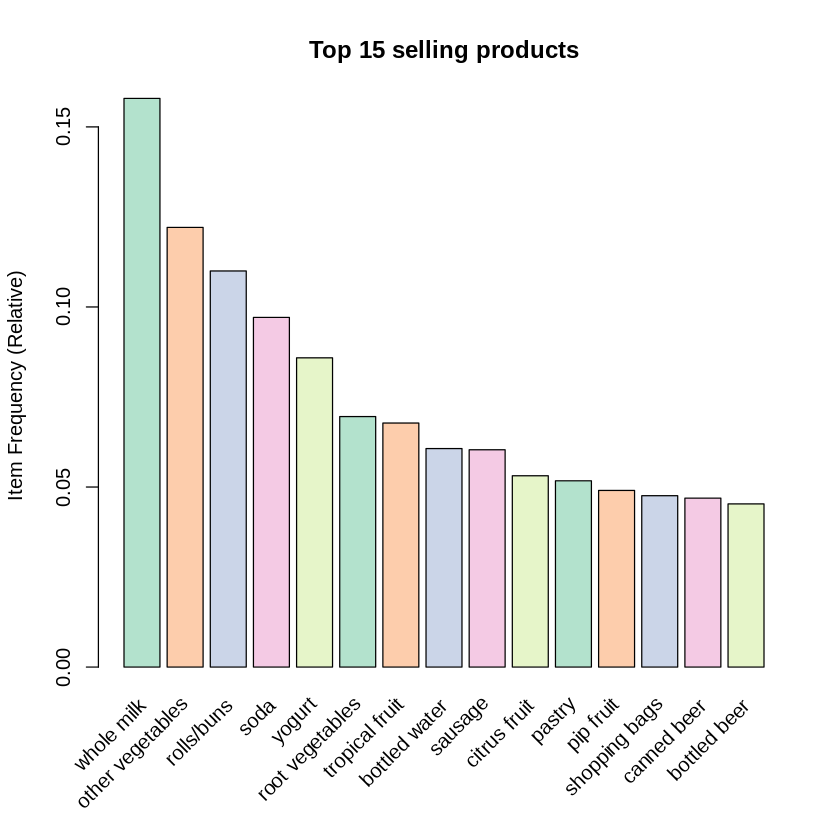

In [57]:
# top 15 sản phẩm bán chạy
arules::itemFrequencyPlot(tr1, topN = 15,
                        col = brewer.pal(5, 'Pastel2'),
                        main = 'Top 15 selling products',
                        type = "relative",
                        ylab = "Item Frequency (Relative)"
)

In [51]:
# Extract rules with specific items: 'sausage'
sausage_rules_lhs <- subset(rules1, subset=lhs %pin% 'sausage')
summary(sausage_rules_lhs)

set of 45 rules

rule length distribution (lhs + rhs):sizes
 2  3 
39  6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.133   2.000   3.000 

summary of quality measures:
    support           confidence         coverage             lift       
 Min.   :0.001069   Min.   :0.01772   Min.   :0.005346   Min.   :0.3752  
 1st Qu.:0.001203   1st Qu.:0.02326   1st Qu.:0.060345   1st Qu.:0.8054  
 Median :0.001537   Median :0.03212   Median :0.060345   Median :0.9627  
 Mean   :0.002260   Mean   :0.05827   Mean   :0.053275   Mean   :0.9966  
 3rd Qu.:0.002473   3rd Qu.:0.05537   3rd Qu.:0.060345   3rd Qu.:1.1534  
 Max.   :0.008955   Max.   :0.25581   Max.   :0.060345   Max.   :1.9119  
     count       
 Min.   : 16.00  
 1st Qu.: 18.00  
 Median : 23.00  
 Mean   : 33.82  
 3rd Qu.: 37.00  
 Max.   :134.00  

mining info:
 data ntransactions support confidence
  tr1         14964   0.001      0.002
                                                             

In [53]:
inspect(sausage_rules_lhs)

     lhs                      rhs                        support     confidence
[1]  {sausage}             => {sliced cheese}            0.001136060 0.01882614
[2]  {sausage}             => {grapes}                   0.001069233 0.01771872
[3]  {sausage}             => {misc. beverages}          0.001069233 0.01771872
[4]  {sausage}             => {beverages}                0.001537022 0.02547065
[5]  {sausage}             => {frozen meals}             0.001269714 0.02104097
[6]  {sausage}             => {long life bakery product} 0.001069233 0.01771872
[7]  {sausage}             => {salty snack}              0.001136060 0.01882614
[8]  {sausage}             => {UHT-milk}                 0.001136060 0.01882614
[9]  {sausage}             => {dessert}                  0.001470195 0.02436323
[10] {sausage}             => {cream cheese}             0.001202887 0.01993355
[11] {sausage}             => {chocolate}                0.001403368 0.02325581
[12] {sausage}             => {white bre

In [56]:
## Convert rules matrix to dataframe
rules1_df <- DATAFRAME(rules1, setStart='', setEnd='', separate = TRUE)
## Check
rules1_df

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,,cleaner,0.002071639,0.002071639,1,1,31
2,,kitchen towels,0.002004812,0.002004812,1,1,30
3,,rum,0.002138466,0.002138466,1,1,32
4,,ketchup,0.002138466,0.002138466,1,1,32
5,,meat spreads,0.002338947,0.002338947,1,1,35
6,,nuts/prunes,0.002205293,0.002205293,1,1,33
7,,jam,0.002272120,0.002272120,1,1,34
8,,cereals,0.002806736,0.002806736,1,1,42
9,,dental care,0.002205293,0.002205293,1,1,33


In [ ]:
# nói chung thì mua sausage thì người ta có thể sẽ mua các sản phẩm ở trên á :)